# 🧠 Data Exploration Notebook

This notebook serves as the **first step** in the end-to-end machine learning workflow. Its purpose is to **understand and explore the structure and quality of the dataset**, setting the stage for effective preprocessing and modeling later on.

---

### 📌 Notebook Objective

In this notebook, we aim to:
- Load and inspect the dataset
- Understand feature types (categorical vs. numerical)
- Explore the target variable (`readmitted`) and clarify the classification setup
- Identify and address potential data quality issues (e.g., missing values, imbalance, redundancy)
- Partition the data for structured exploration of categorical features

---

### 🔍 Why This Matters

A solid understanding of the dataset at this stage:
- Helps avoid downstream issues during modeling
- Reveals patterns that may influence preprocessing choices
- Surfaces early indicators of informative or problematic features

---

### 🧭 Next Steps in the Workflow

The insights gathered here will directly inform the steps in the following notebooks:
- `02_preprocessing_and_feature_engineering.ipynb`
- `03_model_training_and_evaluation.ipynb`
- `04_model_explainability.ipynb`
---
---

## 📊 Exploring the Fundamentals of the Data

In this section, we begin by importing the dataset and performing an initial review to understand its structure and contents.

The goal here is to:
- Get a sense of the dataset's **size and shape**
- Examine **column types** and identify **feature categories** (numerical, categorical, identifiers, etc.)
- Review the **target variable** and how we will frame the prediction task

This exploration lays the groundwork for more detailed analysis and data preparation in the next stages.


In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# Setting the plot style
sns.set(style='whitegrid')


In [144]:
df = pd.read_csv('../data/diabetic_data.csv')
df.head(10)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Observations of the data
The main goal of this project is to predict whether a diabetic patient will be readmitted to the hospital within 30 days of discharge. With this objective in mind, we begin by examining and understanding the structure of the dataset to identify patterns and potential predictors of readmission.

The dataset contains both numerical (e.g., number of medications, time in hospital) and categorical (e.g., race, gender, diagnosis codes) features. In total, there are 50 columns (features) and 101,766 rows, where each row represents a single hospital visit by a patient. It’s important to note that the same patient may appear multiple times, as the dataset logs individual encounters rather than unique individuals.

Furthermore, which will be important in the second part, we have a lot of values in the data that are marked as '?', which is probably a string value. These are in addition to NaN values, concidered missing values and needs to be taken into account. 


/var/folders/r2/rqs61_c910v1q6v3_ddh20rr0000gn/T/ipykernel_96029/33173601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='readmitted', data=df, palette='pastel', order=['<30', '>30', 'NO'])


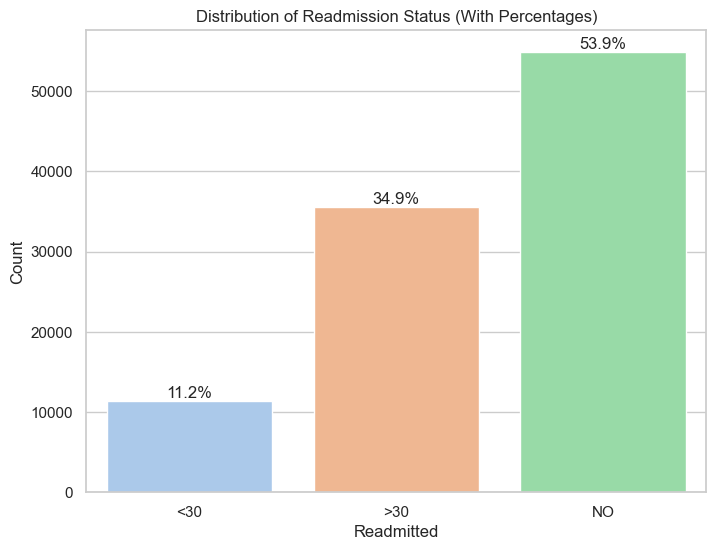

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [145]:
# Visualizing the distribution of the 'readmitted' column (target variable)
plt.figure(figsize=(8,6))
ax = sns.countplot(x='readmitted', data=df, palette='pastel', order=['<30', '>30', 'NO'])

# Add percentage labels on top of bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Readmission Status (With Percentages)')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()


df['readmitted'].value_counts()

### Observations on Target Variable (`readmitted`)

The target variable contains three classes:

- `<30`: Readmitted within 30 days (11.2%)
- `>30`: Readmitted after 30 days (34.9%)
- `NO`: Not readmitted (53.9%)

However, since we are only interested in wheter the patient was re-admittes within 30 days or not we can remake this into a binary classification, where we simply merge those who have not been re-admitted at all with those who were re-admitted after 30 days. This results in the following binary class. 

- `<30`: Readmitted within 30 days (11.2%)
- `>30 || NO`: Readmitted after 30 days (88.8%)

Thus it is evident that the data is very **imbalanced**. This is important to acknowledge early because it can lead to very biased models, that is a model that achieves high accuracy of predicition without actually learning anything useful. In order to prevent this we will need to: 

- Use evaluation metrics that are better suited for imbalanced data such as **F1-score**, **precision/recall**, and **ROC-AUC** instead of just accuracy (even though accuracy is rarley a good metric).
- Concider different techniques during model training such as **Class weighting**, **Oversampling** or **Undersampling**, depending on the model.
- Be careful durin **train-test splitting** to avoid an unbalanced class distribution.

So in summary, we will treat this as a binary classification problem and only focus on predicitng wheter the patient will be re-admitted within 30 days **or not**. Since the positive class is underrepresented, strategies to combat this will need to be concidered.


/var/folders/r2/rqs61_c910v1q6v3_ddh20rr0000gn/T/ipykernel_96029/427610618.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=binary_target, palette='pastel')


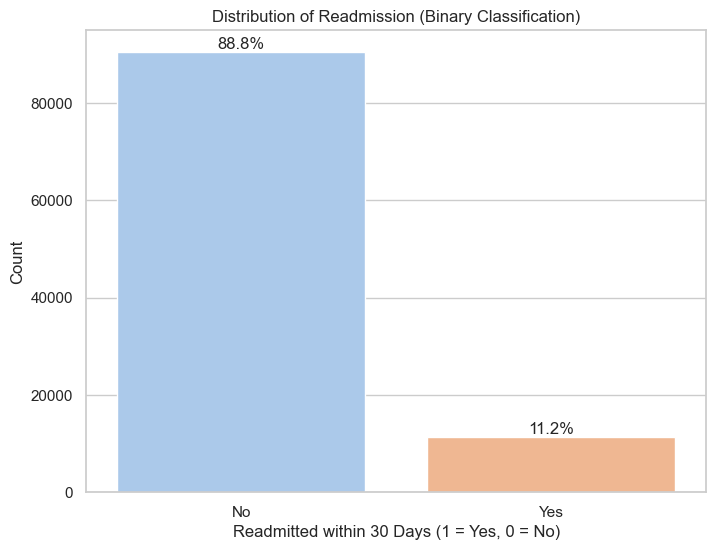

In [146]:
# Visualizing the binary distribution of the 'readmitted' column, after mergin.
# Create a temporary Series to represent the binary version of 'readmitted'
binary_target = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Plot the distribution
plt.figure(figsize=(8,6))
ax = sns.countplot(x=binary_target, palette='pastel')

# Add percentage labels
total = len(binary_target)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Readmission (Binary Classification)')
plt.xlabel('Readmitted within 30 Days (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Optional: label the x-axis
plt.show()


## 🧼 Exploring Missing Values, Distributions, and Correlations

In this section, we take a deeper look at data quality and variable behavior, with a focus on identifying challenges and opportunities for modeling.

Specifically, we will:
- Detect and quantify **missing or placeholder values** (e.g., `'?'`,`'NaN'`, etc  )
- Examine **categorical feature distributions** to spot class imbalance or inconsistent values
- Analyze **numerical feature distributions** for skewness, outliers, or sparsity
- Explore basic **correlations** between numeric variables to identify redundancy or relationships

These insights will inform our decisions in the preprocessing and feature engineering steps that follow.


#### Checking for NaN and missing values ('?')

In [147]:
# Check for NaN values
NaN_counts = df.isnull().sum().sort_values(ascending=False)
print("🔍 Missing (NaN) Values:")
display(NaN_counts[NaN_counts > 0])

# Check for '?' values
question_mark_counts = (df == '?').sum().sort_values(ascending=False)
print("\n🔍 Placeholder '?' Values:")
display(question_mark_counts[question_mark_counts > 0])


🔍 Missing (NaN) Values:


max_glu_serum    96420
A1Cresult        84748
dtype: int64


🔍 Placeholder '?' Values:


weight               98569
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
dtype: int64

### Cleaning Up the Data Enough to Explore it - Dividing into Cathegorical and Numerical data 


In [277]:
# Creating a copy of the DataFrame to avoid modifying the original
df_copy = df.copy()

# Values that are typically concidered placerholder values
placeholder_values = [
    'na', 'Na', 'NA',
    'NaN', 'nan', 'NAN',
    'n/a', 'N/A', 'N\A',
    'n.a.', 'N.A.', 'n.a', 'N.A',
    '?', '-', '--', '.', '*'
]

# Converting placeholder values to NaN
df_copy = df_copy.replace(placeholder_values, pd.NA)

# Dividingng the columns into categorical and numerical features 
categorical_features = df_copy.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
numerical_features = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Catching missplaced columns across the two lists

# Features that have codes (categorical feature) but could be numerical in the data. from IDS_mapping.csv and 
# https://datasets.aim-ahead.net/dataset/p/UCI_DS_296

hidden_cateogircal_features = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

for feature in hidden_cateogircal_features:
    if feature in numerical_features:
        numerical_features.remove(feature)
    if feature not in categorical_features:
        categorical_features.append(feature)


# Removing the target variable from the list of features
target = 'readmitted'

if target in categorical_features: 
    categorical_features.remove(target)
elif target in numerical_features:
    numerical_features.remove(target)


# Generating the categorical and numerical DatFrames
df_categorical = df_copy[categorical_features].copy()
df_numerical = df_copy[numerical_features].copy()

# Test to see if all the columns have been subsetted from the original DataFrame, expect the target variable
if len(categorical_features) + len(numerical_features) != len(df.columns) - 1:
    print('There is a problem with unaccounted columns. Please check the data and code')
else:
    print('No unaccounted columns found')


No unaccounted columns found


#### Summary
Up until this point the data has been checked for NaN values, placeholder values and then divided into numerical and categorical data. This is done on order to better explore the two parts of this data which will give us better knowledge of both parts. From data knowledge we could also adjust the categorical data disguised as numerical data to be where it fits, and lastly a check in order to see that we have not used any feature twice.

### Cathegorical Data

#### Displaying the categoircal data 

In [278]:
df_categorical.head(10)

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id,discharge_disposition_id,admission_source_id
0,Caucasian,Female,[0-10),<NA>,<NA>,Pediatrics-Endocrinology,250.83,<NA>,<NA>,NaN,...,No,No,No,No,No,No,No,6,25,1
1,Caucasian,Female,[10-20),<NA>,<NA>,<NA>,276,250.01,255,NaN,...,No,No,No,No,No,Ch,Yes,1,1,7
2,AfricanAmerican,Female,[20-30),<NA>,<NA>,<NA>,648,250,V27,NaN,...,No,No,No,No,No,No,Yes,1,1,7
3,Caucasian,Male,[30-40),<NA>,<NA>,<NA>,8,250.43,403,NaN,...,No,No,No,No,No,Ch,Yes,1,1,7
4,Caucasian,Male,[40-50),<NA>,<NA>,<NA>,197,157,250,NaN,...,No,No,No,No,No,Ch,Yes,1,1,7
5,Caucasian,Male,[50-60),<NA>,<NA>,<NA>,414,411,250,NaN,...,No,No,No,No,No,No,Yes,2,1,2
6,Caucasian,Male,[60-70),<NA>,<NA>,<NA>,414,411,V45,NaN,...,No,No,No,No,No,Ch,Yes,3,1,2
7,Caucasian,Male,[70-80),<NA>,<NA>,<NA>,428,492,250,NaN,...,No,No,No,No,No,No,Yes,1,1,7
8,Caucasian,Female,[80-90),<NA>,<NA>,<NA>,398,427,38,NaN,...,No,No,No,No,No,Ch,Yes,2,1,4
9,Caucasian,Female,[90-100),<NA>,<NA>,InternalMedicine,434,198,486,NaN,...,No,No,No,No,No,Ch,Yes,3,3,4


#### Observations of the Categorical Data  
Here, we can see that there are some binary categorical features, some with a large number of distinct values, and others that contain a significant amount of missing data. To make exploration more efficient and structured, we will partition the categorical features into four subsets:

1. Features with a high number of missing values. These will be grouped separately, as they are unlikely to provide much insight during exploration.
2. Features that are purely **binary** (i.e., exactly two unique values, NaN does not count for this).
3. Features with a few distinct values — specifically, between 3 and 10.
4. Features with **high cardinality**, meaning more than 10 unique values, but without a high proportion of missing data.

In the next section, this partitioning will be carried out explicitly.


### Partitioning the Cathegorical Data into Subsets Based on the Observations

#### Partitioning the Missing Values into its own subset and removing it from the cathegoical dataset

In [279]:
# Threshold for partitoning set at 35% of total numbers in a column missing.
threshold = 0.35 * len(df_categorical)

# Creating a subset with features that have a greater NaN value than the threshold
df_missing_values = df_categorical.loc[:, df_categorical.isnull().sum() > threshold]

# Displaying the features with high NaN values
print("Number of features with NaN values greater than the threshold: ", len(df_missing_values.columns))

# Dropping the features with high NaN values in the categorical DataFrame
for col in df_missing_values.columns:
    if col in df_categorical.columns:
        df_categorical.drop(col, axis =1 , inplace=True)

# Displaying the remaining categorical features
print("Remaining categorical features after dropping high NaN values:", len(df_categorical.columns))
df_categorical.head(10)


Number of features with NaN values greater than the threshold:  5
Remaining categorical features after dropping high NaN values: 34


,race,gender,age,diag_1,diag_2,diag_3,metformin,repaglinide,nateglinide,chlorpropamide,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,admission_type_id,discharge_disposition_id,admission_source_id
0,Caucasian,Female,[0-10),250.83,<NA>,<NA>,No,No,No,No,...,No,No,No,No,No,No,No,6,25,1
1,Caucasian,Female,[10-20),276,250.01,255,No,No,No,No,...,No,No,No,No,No,Ch,Yes,1,1,7
2,AfricanAmerican,Female,[20-30),648,250,V27,No,No,No,No,...,No,No,No,No,No,No,Yes,1,1,7
3,Caucasian,Male,[30-40),8,250.43,403,No,No,No,No,...,No,No,No,No,No,Ch,Yes,1,1,7
4,Caucasian,Male,[40-50),197,157,250,No,No,No,No,...,No,No,No,No,No,Ch,Yes,1,1,7
5,Caucasian,Male,[50-60),414,411,250,No,No,No,No,...,No,No,No,No,No,No,Yes,2,1,2
6,Caucasian,Male,[60-70),414,411,V45,Steady,No,No,No,...,No,No,No,No,No,Ch,Yes,3,1,2
7,Caucasian,Male,[70-80),428,492,250,No,No,No,No,...,No,No,No,No,No,No,Yes,1,1,7
8,Caucasian,Female,[80-90),398,427,38,No,No,No,No,...,No,No,No,No,No,Ch,Yes,2,1,4
9,Caucasian,Female,[90-100),434,198,486,No,No,No,No,...,No,No,No,No,No,Ch,Yes,3,3,4


#### Partitioning Binary Data

In [280]:
# Getting the column names where we exactly 2 unique values (i.e. its binary)
binary_cols = df_categorical.nunique()[df_categorical.nunique() == 2].index # note that NaN values are not counted

# Displaying the binary columns
print("Binary columns extraced from the categorical DataFrame:", binary_cols)
print("Number of binary columns:", len(binary_cols))

# Creating a new DataFrame consisting only of binary features
df_binary = df_categorical[binary_cols].copy()

# Displaying the binary DataFrame
df_binary.nunique()

Binary columns extraced from the categorical DataFrame: Index(['acetohexamide', 'tolbutamide', 'troglitazone', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')
Number of binary columns: 9


acetohexamide               2
tolbutamide                 2
troglitazone                2
glipizide-metformin         2
glimepiride-pioglitazone    2
metformin-rosiglitazone     2
metformin-pioglitazone      2
change                      2
diabetesMed                 2
dtype: int64

#### Partitioning Categoriacal Data with classes in the range [3, 10]

In [283]:
# Creating a new DataFrame consisting only of non-binary categorical features
df_low_cardinality = df_categorical.loc[:, df_categorical.nunique().between(3, 10)].copy()

# Displaying found values 
print('Number of found features:', len(df_low_cardinality.columns))
df_low_cardinality.nunique()

Number of found features: 18


race                    5
gender                  3
age                    10
metformin               4
repaglinide             4
nateglinide             4
chlorpropamide          4
glimepiride             4
glipizide               4
glyburide               4
pioglitazone            4
rosiglitazone           4
acarbose                4
miglitol                4
tolazamide              3
insulin                 4
glyburide-metformin     4
admission_type_id       8
dtype: int64

#### Partitioning Categoriacal Data with feature that has more than 10 classes.

In [285]:
# Selecting categorical features with more than 10 unique classes (i.e., high cardinality)
df_high_cardinality = df_categorical.loc[:, df_categorical.nunique() > 10].copy()

# Displaying values found
print('Number of found features:', len(df_high_cardinality.columns))
df_high_cardinality.nunique()

Number of found features: 5


diag_1                      716
diag_2                      748
diag_3                      789
discharge_disposition_id     26
admission_source_id          17
dtype: int64

#### Quick Check that all values are accounted for

In [308]:
# Short function that checks if the features have less than 2 unique values
def check_missing_values(df):
    count = 0
    for col in df.columns:
        if df[col].nunique() < 2:
            print(col, 'has less than two unique values')
            count += 1
    return count


# Checking the number total number of partitoned features
num_of_partitioned_features = len(df_high_cardinality.columns) + len(df_low_cardinality.columns) + len(df_binary.columns)

# Comparing if all features have been accounted for
if num_of_partitioned_features != len(df_categorical.columns):
    print('There are unaccounted columns. Checking for potential reason...')
    
    print('\n...')
    # Checking if all unaccounted columns have less than 2 unique values
    count = check_missing_values(df_categorical)
    print('...\n')

    # Checking if all the unaccounted columns have less than 2 unique values
    delta_missing = len(df_categorical.columns) - num_of_partitioned_features

    if delta_missing != count:
        print('WARNING!! There are unaccounted columns with more than 2 unique values. Please check the data and code !!')
    else:
        print('All unaccounted columns have less than 2 unique values. There are no problems here.')
        df_unaccounted = df_categorical.loc[:, df_categorical.nunique() < 2].copy()

else:
    print('No unaccounted columns found')


There are unaccounted columns. Checking for potential reason...

...
examide has less than two unique values
citoglipton has less than two unique values
...

All unaccounted columns have less than 2 unique values. There are no problems here.


#### Displaying the remaining two cateogires that has only 1 class

In [309]:
df_unaccounted.head(10)

,examide,citoglipton
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
5,No,No
6,No,No
7,No,No
8,No,No
9,No,No


#### ✅ Partitioning Results

The partitioning process resulted in the following:

- `X` binary features (2 unique values)
- `Y` low-cardinality features (3–10 unique values)
- `Z` high-cardinality features (>10 unique values)
- `2` features removed for having fewer than 2 unique values

This structure allows us to more efficiently assess quality, imbalance, and encoding strategies tailored to each group in the next steps.


---
### Exploring the Categorical Data

Now that the categorical features have been cleaned and partitioned into three subsets — binary, low-cardinality, and high-cardinality — we can systematically explore their structure. The aim is to assess which features are informative and which may require transformation or removal prior to modeling.

For each subset, we will analyze the following:

1. **Class imbalance** — Features where one class dominates may not provide useful signal.
2. **Constant or low variance** — Features with little to no variation across samples are unlikely to be predictive.
3. **Missing values (`NaN`)** — Placeholder values such as `'unknown'`, `'N/A'`, `'other'`, etc. have already been replaced. We now evaluate actual missingness per feature.
4. **Redundancy & Outliers** — Some features may contain overlapping or duplicate information and may be redudant. Moreover, some classes may be unique in their respective feature - Not nececarily bad, but it is important to note. 




#### Exploring the Partitioned Binary Data

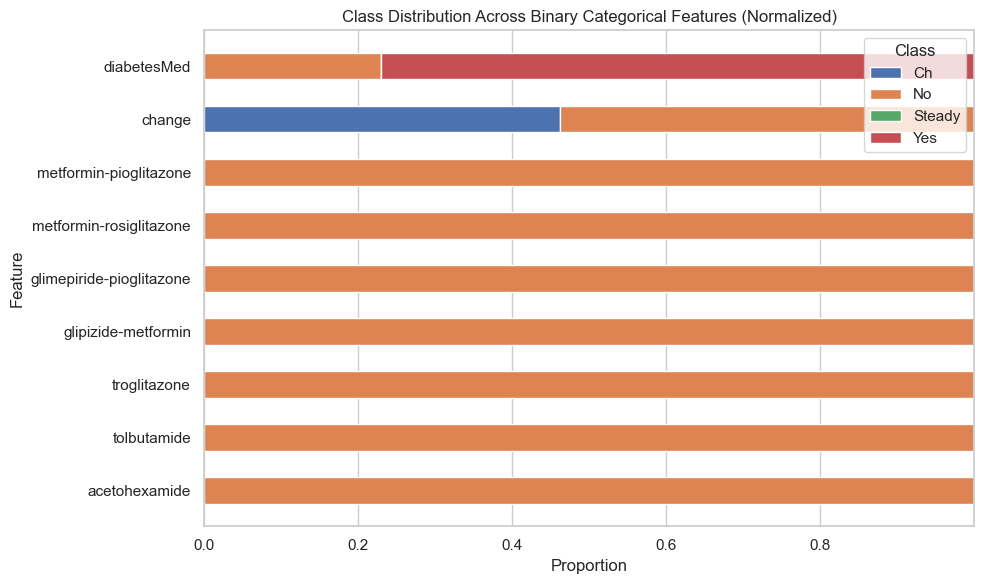

Features with a variance greater than 0.90
 acetohexamide                True
tolbutamide                  True
troglitazone                 True
glipizide-metformin          True
glimepiride-pioglitazone     True
metformin-rosiglitazone      True
metformin-pioglitazone       True
change                      False
diabetesMed                 False
dtype: bool

No NaN values found

No duplicate columns found.

Checking for high overlap between the binary features:

High overlap (1.00) between acetohexamide and tolbutamide
High overlap (1.00) between acetohexamide and troglitazone
High overlap (1.00) between acetohexamide and glipizide-metformin
High overlap (1.00) between acetohexamide and glimepiride-pioglitazone
High overlap (1.00) between acetohexamide and metformin-rosiglitazone
High overlap (1.00) between acetohexamide and metformin-pioglitazone
High overlap (1.00) between tolbutamide and troglitazone
High overlap (1.00) between tolbutamide and glipizide-metformin
High overlap (1.0

In [ ]:
# 1.    Checking the class imbalance of the binary subset

# Get normalized value counts (percentage) for each binary feature
binary_dist = df_binary[binary_cols].apply(lambda x: x.value_counts(normalize=True)).T.fillna(0)

# Rename columns so they're consistent (e.g., Yes/No instead of actual values)
# Optional: reorder if needed
binary_dist = binary_dist[[col for col in binary_dist.columns]]  # Keeps existing order

# Plot
plt.figure(figsize=(10, 6))
bottom = None

# Plot each class (e.g., 'No', 'Yes') as a layer of the bar
for class_value in binary_dist.columns:
    plt.barh(
        binary_dist.index,
        binary_dist[class_value],
        label=str(class_value),
        left=bottom,
        height=0.5
    )
    if bottom is None:
        bottom = binary_dist[class_value].copy()
    else:
        bottom += binary_dist[class_value]

# Formatting
plt.title('Class Distribution Across Binary Categorical Features (Normalized)')
plt.xlabel('Proportion')
plt.ylabel('Feature')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

# 2.    Checking the variance of the binary subset 
print('Features with a variance greater than 0.90\n', binary_dist.max(axis=1) > 0.90)

# 3.    Evaluating i) If there exists missing values and ii) the missingnes of the binary subset 
print("\nNo NaN values found" if df_binary.isna().sum().sum() == 0 else f"NaN values found:\n{df_binary.isna().sum()}")

# 4.    Checking for Redundancy across Features

# i) Identifying duplicate columns — features that have exactly the same values across all rows.
duplicates = df_binary.T.duplicated(keep=False)
print("\nNo duplicate columns found." if not duplicates.any() else f"\nDuplicate columns found:\n{duplicates[duplicates]}")

# ii) Check features that have high similarity ≥ 95% overlap in values.
print('\nChecking for high overlap between the binary features:\n')
for i, col1 in enumerate(binary_cols):
    for j in range(i + 1, len(binary_cols)):
        col2 = binary_cols[j]
        # Calculating the overlap
        overlap = df_binary[col1].eq(df_binary[col2]).mean()
        
        if overlap >= 0.95:
            print(f"High overlap ({overlap:.2f}) between {col1} and {col2}")



#### ✅ Summary of Binary Categorical Feature Exploration

The exploration of binary categorical features reveals several key insights:

- **Severe Class Imbalance:**  
  Most features are heavily skewed toward a single class, with over 90% of observations falling into one category. This imbalance may reduce predictive power and can contribute to model bias if not handled during preprocessing.

- **Low Variance And Redundancy:**  
  7 of the 9 binary features exhibit extremely low variance and additionally, many of these features are **perfectly correlated** with each other (100% overlap), indicating **redundant information**. These features will likely be dropped or consolidated during preprocessing to reduce dimensionality.

- **Retained Informative Features:**  
  Only `change` and `diabetesMed` show meaningful variation and no redundancy. These features are very likely to retain some kind of value in the modeling pipeline process.

- **Data Quality:**  
  No missing values (`NaN`) were found, and no exact duplicate columns were detected.


#### Exploring the Partitioned Low-Cardinality Data

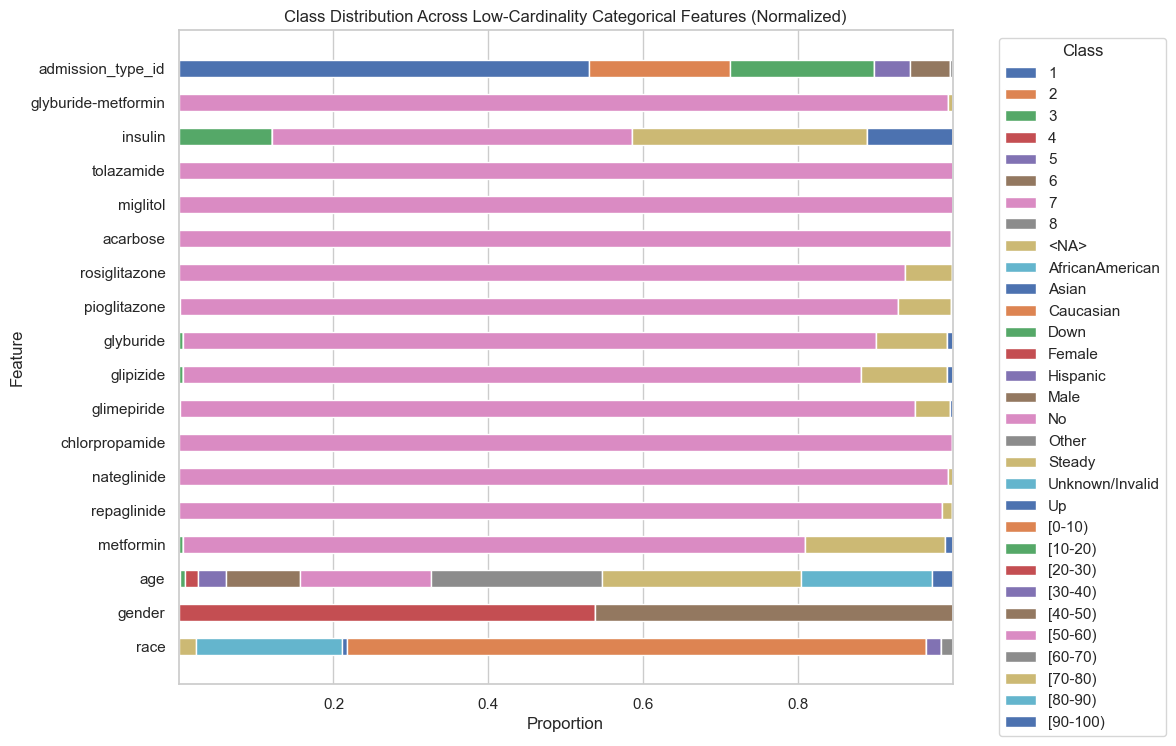

Features with a variance greater than 0.90
 race                   False
gender                 False
age                    False
metformin              False
repaglinide             True
nateglinide             True
chlorpropamide          True
glimepiride             True
glipizide              False
glyburide              False
pioglitazone            True
rosiglitazone           True
acarbose                True
miglitol                True
tolazamide              True
insulin                False
glyburide-metformin     True
admission_type_id      False
dtype: bool

NaN values found:
race                   2273
gender                    0
age                       0
metformin                 0
repaglinide               0
nateglinide               0
chlorpropamide            0
glimepiride               0
glipizide                 0
glyburide                 0
pioglitazone              0
rosiglitazone             0
acarbose                  0
miglitol                  0
tolazamide 

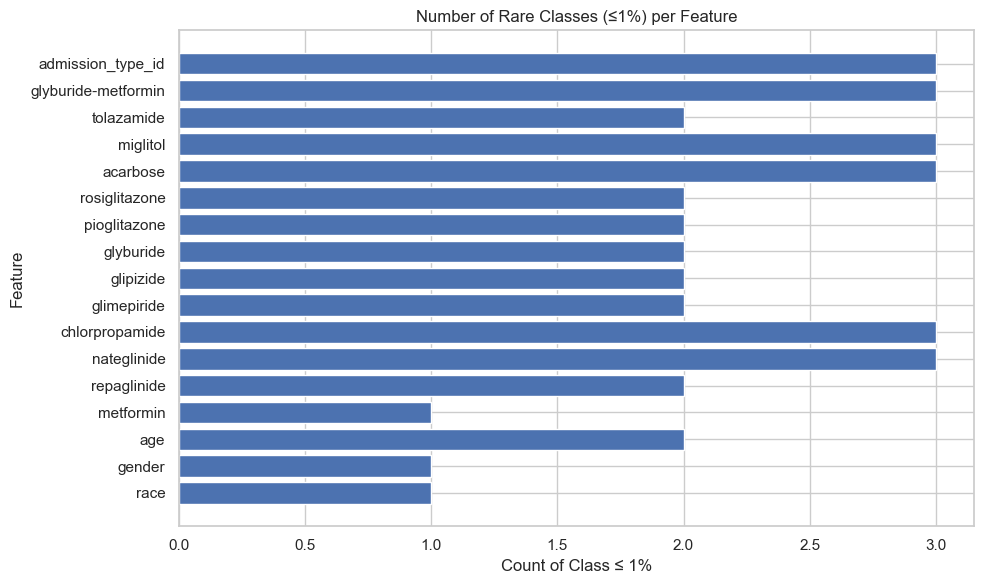

In [361]:
# 1.    Checking the class imbalance of the low-cardinality subset

# Creating a copy with purley strings (i.e., no mixed data types) used for plotting
df_low_cardinality_clean = df_low_cardinality.astype(str).copy()

# Get normalized value counts for each feature (transpose for plotting)
low_card_dist = df_low_cardinality_clean.apply(lambda x: x.value_counts(normalize=True)).T.fillna(0)

# Plotting class distributions
plt.figure(figsize=(12, 8))
bottom = None

for class_value in low_card_dist.columns:
    plt.barh(
        low_card_dist.index,
        low_card_dist[class_value],
        label=str(class_value),
        left=bottom,
        height=0.5
    )
    if bottom is None:
        bottom = low_card_dist[class_value].copy()
    else:
        bottom += low_card_dist[class_value]

plt.title('Class Distribution Across Low-Cardinality Categorical Features (Normalized)')
plt.xlabel('Proportion')
plt.ylabel('Feature')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2.    Checking the variance of the low-cardinality subset 
print('Features with a variance greater than 0.90\n', low_card_dist.max(axis=1) > 0.90)

# 3.    Evaluating i) If there exists missing values and ii) the missingnes of the low-cardinality subset 
print("\nNo NaN values found" if df_low_cardinality.isna().sum().sum() == 0 else f"\nNaN values found:\n{df_low_cardinality.isna().sum()}")


# 4.    Checking for Redundancy across Features

# i) Identifying duplicate columns — features that have exactly the same values across all rows.
duplicates_lc = df_low_cardinality.T.duplicated(keep=False)
print("\nNo duplicate columns found." if not duplicates_lc.any() else f"\nDuplicate columns found:\n{duplicates_lc[duplicates_lc]}")

# ii) Check features that have high similarity ≥ 95% overlap in values.
print('\nChecking for high overlap between the low-cardinality features (handling NaNs):\n')

lo_cols = df_low_cardinality.columns

for i, col1 in enumerate(lo_cols):
    for j in range(i + 1, len(lo_cols)):
        col2 = lo_cols[j]

        # Fill NaNs with a placeholder value before comparison
        s1 = df_low_cardinality[col1].fillna('___missing___')
        s2 = df_low_cardinality[col2].fillna('___missing___')

        overlap = (s1 == s2).mean()

        if overlap >= 0.95:
            print(f"High overlap ({overlap:.2f}) between {col1} and {col2}")


# iii) Check for "outliers" - I.e., classes that are very rare (< 1% of the total count)
rare_classes = []

for col in df_low_cardinality.columns:
    value_ratios = df_low_cardinality[col].value_counts(normalize=True)
    for category, ratio in value_ratios.items():
        if ratio <= 0.01:
            rare_classes.append((category, col))

# Visualizing rare classes found per feature
feature_counts = Counter([col for _, col in rare_classes])
plt.figure(figsize=(10, 6))
plt.barh(list(feature_counts.keys()), list(feature_counts.values()))
plt.title("Number of Rare Classes (≤1%) per Feature")
plt.xlabel("Count of Class ≤ 1%")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



#### Summary

The low-cardinality subset (features with 3–10 unique values) consists of 18 categorical variables. These were explored to understand their distribution, potential redundancy, and informativeness. The following insights were observed:

- **Class Imbalance:**  
  Most features exhibit **class imbalances**, where one category dominates the distribution which could reduce predictive power and may require resampling or grouping rare categories later.

- **Low Variance Features:**  
  Over half of the features have **very low variance**, with more than 90% of observations falling into a single class. These features may provide limited value for modeling and are potential candidates for removal or transformation.

- **Missing Values:**  
  Only one feature (`race`) contains missing data (~2.2%), which is manageable and can either be imputed or handled separately during preprocessing.

- **Redundancy (Feature Overlap ≥ 95%):**  
  Several features were found to be **highly overlapping or even fully redundant**. However, These features likely represent flags for rarely used medications and will probably be merged or dropped during preprocessing to reduce dimensionality.

- **Rare Class Detection (≤1% of Total):**  
  Several features contain categories that appear in fewer than 1% of samples. These outliers were identified and visualized. Features with multiple rare classes may require encoding strategies or grouping to ensure generalizability and minimize noise.



#### Exploring the Partitioned High-Cardinality Data

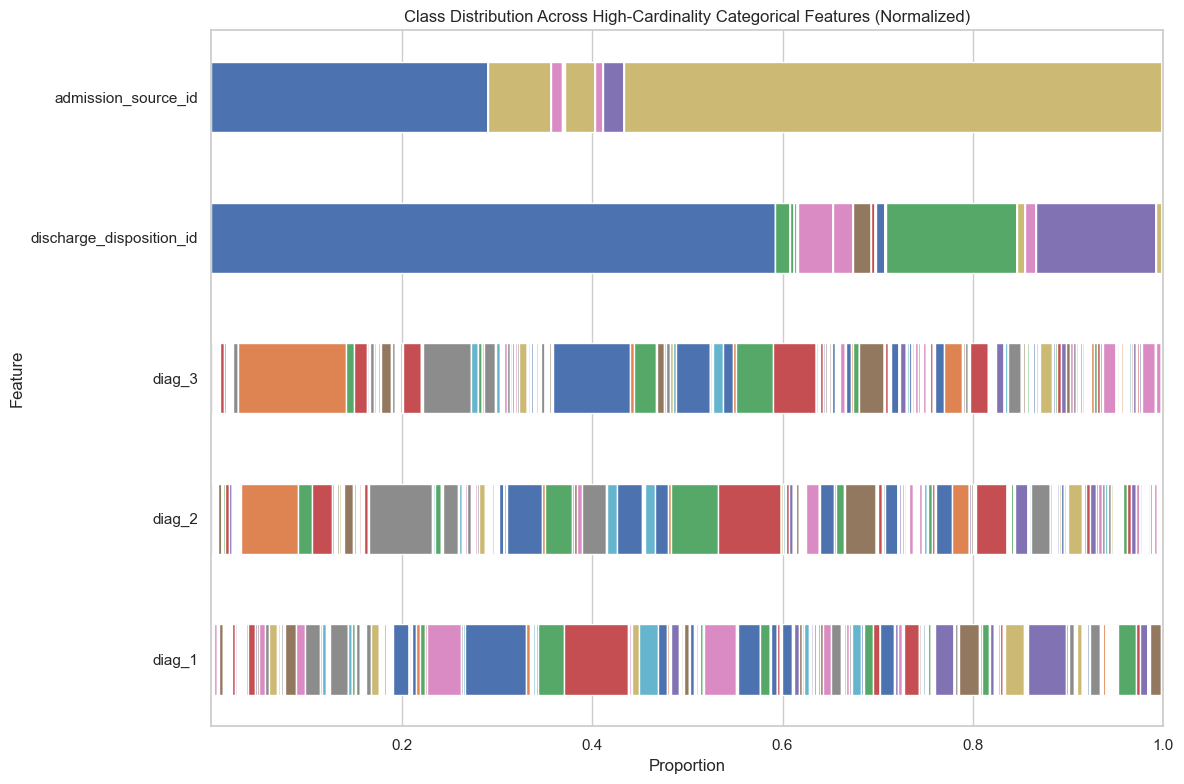

Features with a variance greater than 0.90
 diag_1                      False
diag_2                      False
diag_3                      False
discharge_disposition_id    False
admission_source_id         False
dtype: bool

NaN values found:
diag_1                        21
diag_2                       358
diag_3                      1423
discharge_disposition_id       0
admission_source_id            0
dtype: int64

No duplicate columns found.

Checking for high overlap between the low-cardinality features (handling NaNs):



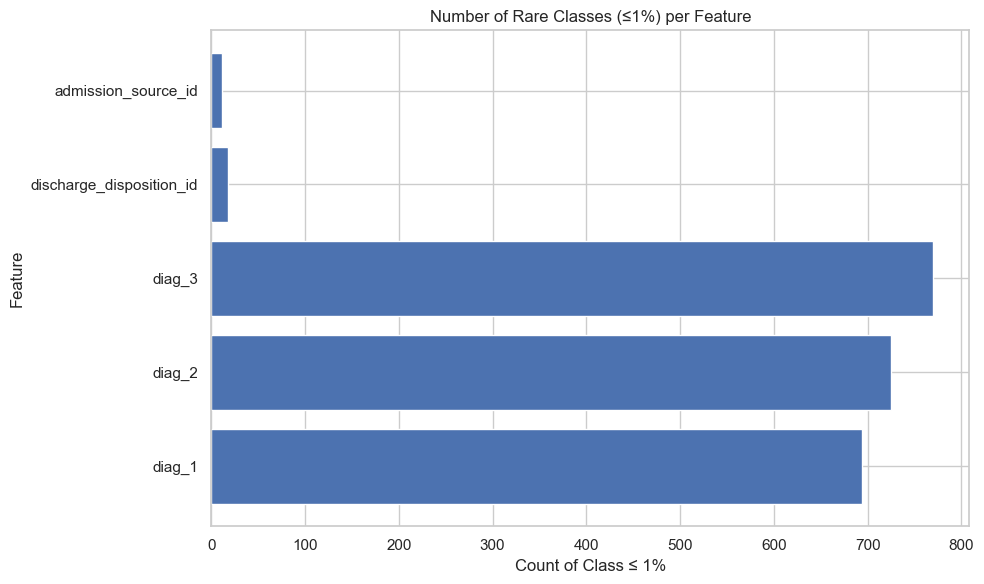

In [ ]:
# 1.    Checking the class imbalance of the binary subset
# Creating a copy with purely strings for consistency
df_high_cardinality_clean = df_high_cardinality.astype(str).copy()

# Get normalized value counts for each feature
high_card_dist = df_high_cardinality_clean.apply(lambda x: x.value_counts(normalize=True)).T.fillna(0)

# Plotting (without legend)
plt.figure(figsize=(12, 8))
bottom = None

for class_value in high_card_dist.columns:
    plt.barh(
        high_card_dist.index,
        high_card_dist[class_value],
        left=bottom,
        height=0.5
    )
    if bottom is None:
        bottom = high_card_dist[class_value].copy()
    else:
        bottom += high_card_dist[class_value]

plt.title('Class Distribution Across High-Cardinality Categorical Features (Normalized)')
plt.xlabel('Proportion')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



# 2.    Checking the variance of the high-cardinality subset 
print('Features with a variance greater than 0.90\n', high_card_dist.max(axis=1) > 0.90)

# 3.    Evaluating i) If there exists missing values and ii) the missingnes of the high-cardinality subset 
print("\nNo NaN values found" if df_high_cardinality.isna().sum().sum() == 0 else f"\nNaN values found:\n{df_high_cardinality.isna().sum()}")



# 4.    Checking for Redundancy in Categorical Features
duplicates_lc = df_low_cardinality.T.duplicated(keep=False)
print("\nNo duplicate columns found." if not duplicates_lc.any() else f"\nDuplicate columns found:\n{duplicates_lc[duplicates_lc]}")

# ii) Check features that have high similarity ≥ 95% overlap in values.
print('\nChecking for high overlap between the low-cardinality features (handling NaNs):\n')

high_cols = df_high_cardinality_clean.columns

for i, col1 in enumerate(high_cols):
    for j in range(i + 1, len(high_cols)):
        col2 = high_cols[j]

        # Fill NaNs with a placeholder value before comparison
        s1 = df_high_cardinality_clean[col1].fillna('___missing___')
        s2 = df_high_cardinality_clean[col2].fillna('___missing___')

        overlap = (s1 == s2).mean()

        if overlap >= 0.95:
            print(f"High overlap ({overlap:.2f}) between {col1} and {col2}")


# iii) Check for "outliers" - I.e., classes that are very rare (< 1% of the total count)
rare_classes = []

for col in df_high_cardinality_clean.columns:
    value_ratios = df_high_cardinality_clean[col].value_counts(normalize=True)
    for category, ratio in value_ratios.items():
        if ratio <= 0.01:
            rare_classes.append((category, col))

# Visualizing rare classes found per feature
feature_counts = Counter([col for _, col in rare_classes])
plt.figure(figsize=(10, 6))
plt.barh(list(feature_counts.keys()), list(feature_counts.values()))
plt.title("Number of Rare Classes (≤1%) per Feature")
plt.xlabel("Count of Class ≤ 1%")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Summary

- **Class Distribution:**  
  While most features (like `diag_1`, `diag_2`, and `diag_3`) exhibit a very high number of unique categories, they are somewhat more evenly distributed than expected — though still heavily skewed in parts. In contrast, `admission_source_id` and `discharge_disposition_id` are more imbalanced, with a few categories dominating the majority of the data.

- **Variance and Redundancy:**  
  None of the high-cardinality features were constant or showed extremely low variance. Additionally, no redundant columns or highly overlapping pairs (≥ 95%) were detected, which suggests each feature is capturing distinct information.

- **Missingness:**  
  Missing values are present but relatively limited. Most notably:
  - `diag_3`: 1,423 missing
  - `diag_2`: 358 missing
  - `diag_1`: 21 missing
  Which is manageable and will be taken care of during the data preparation process. 

- **Rare Categories:**  
  A significant number of individual categories within the `diag_*` features appear in fewer than 1% of the observations. These rare categories may contribute noise or sparsity during modeling if not handled properly.

**Conclusion:**  
The high-cardinality subset appears to be of generally good quality — with limited redundancy and manageable missingness. However, special attention should be given to the `diag_*` features due to their high number of rare values. Grouping or simplifying these features during preprocessing may help reduce complexity and improve model performance.


### Numerical Data

#### RANDOM SIZE 

In [367]:
print("Hej")

Hej
